In [22]:
# Machine learning classification libraries 
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score

In [23]:
# for data manipulation
import numpy as np
import pandas as pd

#to plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

# to fetch data
from pandas_datareader import data as pdr

# fetch data
download S&P500 data from google finance using pandas_datareader

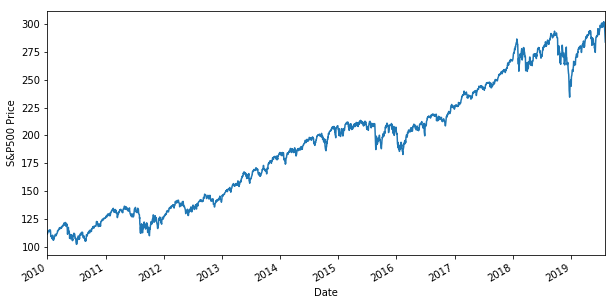

In [50]:
Df = pdr.get_data_yahoo('SPY', start='2010-01-01', end='2019-08-06')
Df = Df.dropna()
Df.Close.plot(figsize=(10,5))
plt.ylabel('S&P500 Price')
plt.show()

# Determine the target variable
the target variable is variable which machine learning classification algorithm will predict.In this example, the target variable is whether S&P500 price will close up or close down on the next trading day.
we will first determine the actual trading signal usingthe following logic-if next trading day's close price is greater than today's close price then, wee will buy the S&p500 index, else we will sell the S&P500 index. We will stor +1 for the buy signal and -1 for sell signal.

In [51]:
y = np.where(Df['Close'].shift(-1)>Df['Close'],1,-1)

# creation of predictions variable

the X is a dataset that holds the predictor's variables which are usedto predict target variable, 'y'. the X consist of variable such as 'Open-Close' and 'High-Low'. these can be understood as indicators based on which the algorithm will predict the option price

In [52]:
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low

X = Df[['Open-Close', 'High-Low']]

in the later part of the code, the machine learning classification algorithm will use the predictors and target variable in the training phase to create the modeland then, predict the target variable in the test dataset.

# Test and train dataset split

In [53]:
split_percentage = 0.8
split = int(split_percentage*len(Df))# mark the split location at data

#train dataset
X_train = X[:split]
y_train = y[:split]

#test dataset
X_test = X[split:]
y_test = y[split:]


# creating machine learning classification model using train dataset

In [54]:
model = SVC().fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# classification model accuracy
__Syntax__:accuracy_score(target_actual_value, target_predicted_value)                                                          
1.target_actual_value:correct signal value
2.target_predicted_value:predicted signal values

In [55]:
accuracy_train = accuracy_score(y_train, model.predict(X_train))

accuracy_test = accuracy_score(y_test, model.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 55.00%
Test Accuracy: 55.07%


# Prediction
We will predict the signal (buy or sell) for the test dataset, using the model.predict()function. Then, we willcompute the strategy return based on the signal predicted by the model in the test dataset. We save it in the column 'Strategy_Return' and then, plot the cumulative strategy retrun.

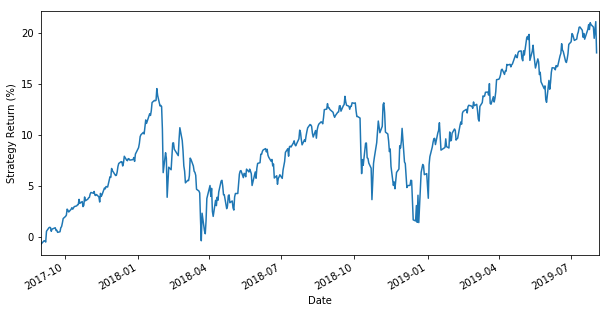

In [57]:
Df['Predicted_Signal'] = model.predict(X)
# calculate log retturn
Df['Return'] = np.log(Df.Close.shift(-1)/Df.Close)*100
Df['Strategy_Return'] = Df.Return*Df.Predicted_Signal
Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel('Strategy Return (%)')

plt.show()